# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [3]:
file1 = 'data1.pkl'

In [4]:
df = joblib.load('data1.pkl')

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [5]:
# 숫자형 변수 분석
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('=' * 110)
    print()
    print(f'<< {var} 기초통계량 >>')
    display(data[[var]].describe().T)

    # 시각화
    print(f'<< {var} 시각화 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [6]:
# 범주형 변수 분석
def eda_1_cat(data, var) :
    # 기초통계량
    print('=' * 110)
    print()
    print(f'<< {var} 기초통계량 >>')
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    
    # 시각화
    print(f'<< {var} 시각화 >>')
    sns.countplot(x = var, data = data)
    plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   request_cnt       2921 non-null   int64         
 3   ride_cnt          2921 non-null   int64         
 4   waiting_time      2921 non-null   float64       
 5   fare              2921 non-null   int64         
 6   distance          2921 non-null   int64         
 7   weekday           2921 non-null   category      
 8   month             2921 non-null   category      
 9   week              2921 non-null   category      
 10  year              2921 non-null   category      
 11  target            2921 non-null   float64       
 12  temp_max          2921 non-null   float64       
 13  temp_min          2921 non-null   float64       
 14  rain(mm)          2921 n

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [8]:
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'weekday', 'month', 'week', 'year', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'is_holiday', 'ave_waiting_time', 'ride_rate'],
      dtype='object')

In [9]:
numerical_var = ['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare', 'distance',
                 'target', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
                 'ave_waiting_time', 'ride_rate']


<< car_cnt 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
car_cnt,2921.0,418.755221,133.747019,132.0,278.0,454.0,522.0,1413.0


<< car_cnt 시각화 >>


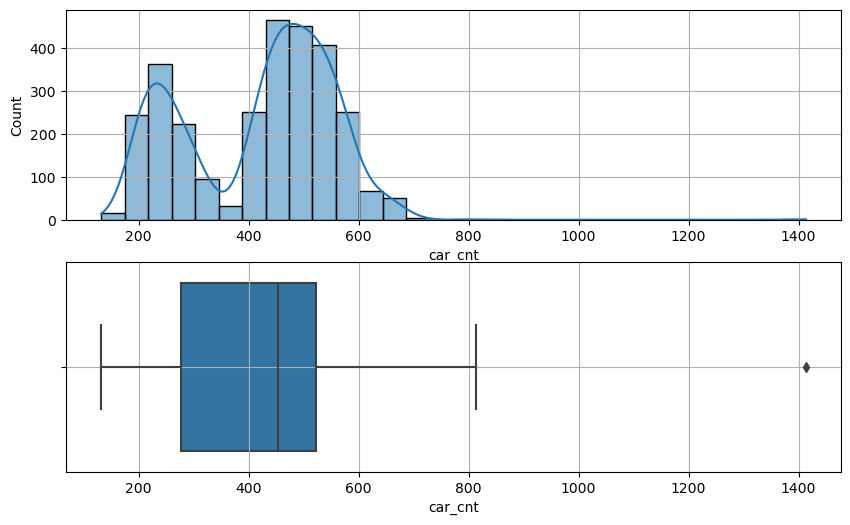


<< request_cnt 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
request_cnt,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


<< request_cnt 시각화 >>


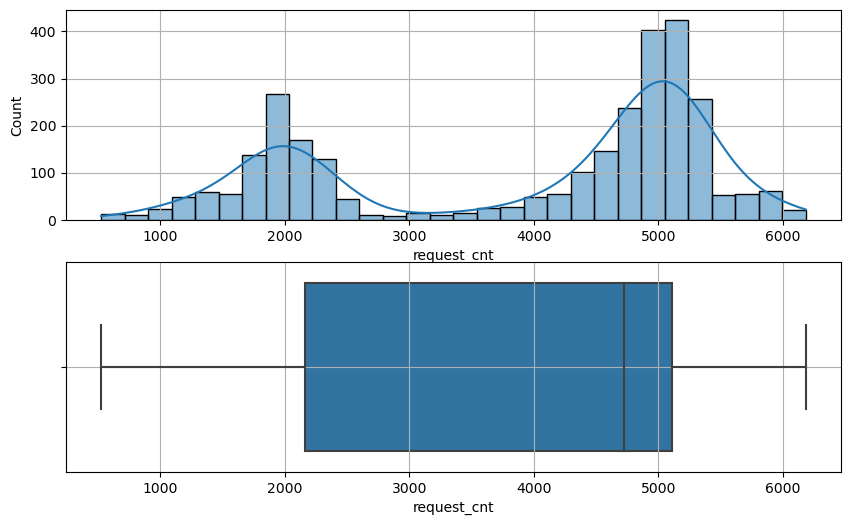


<< ride_cnt 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ride_cnt,2921.0,3284.401232,1249.080267,462.0,1779.0,3933.0,4241.0,5189.0


<< ride_cnt 시각화 >>


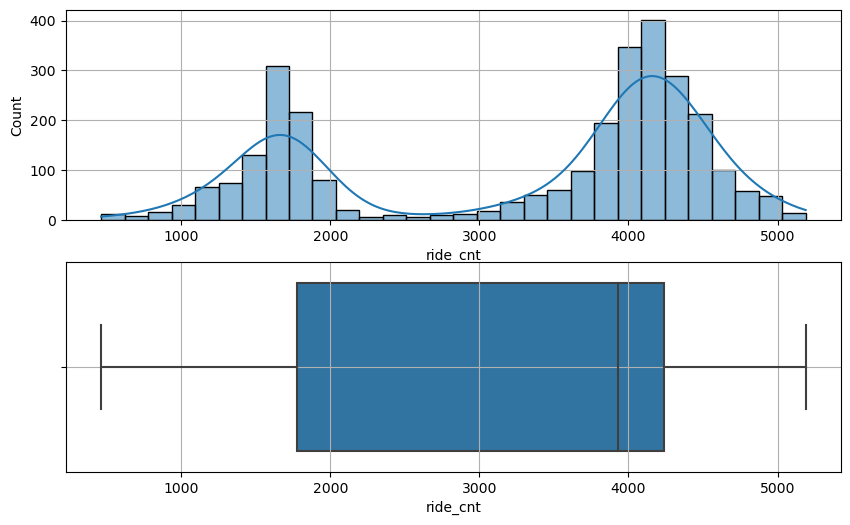


<< waiting_time 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
waiting_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


<< waiting_time 시각화 >>


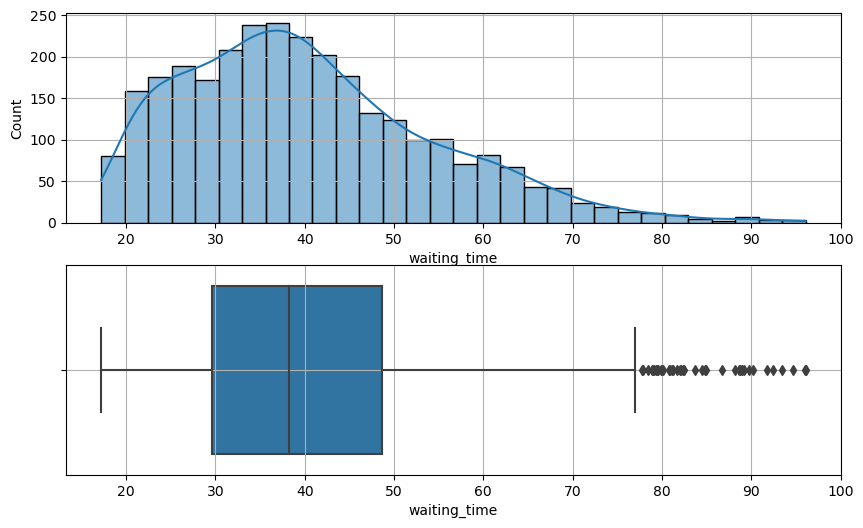


<< fare 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


<< fare 시각화 >>


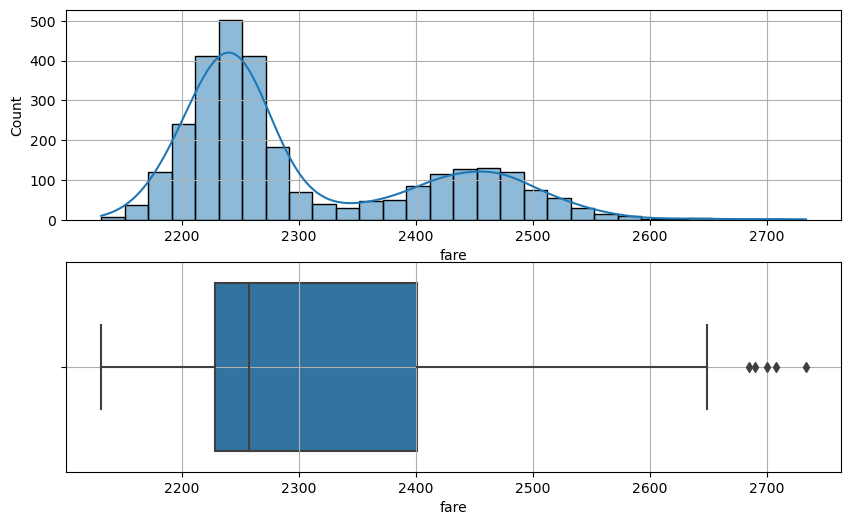


<< distance 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


<< distance 시각화 >>


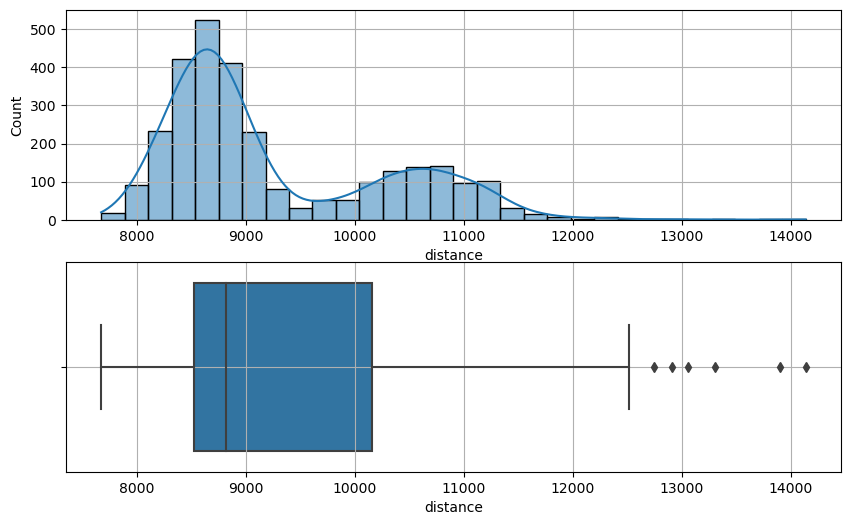


<< target 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
target,2921.0,40.311537,14.097409,17.2,29.6,38.2,48.6,96.1


<< target 시각화 >>


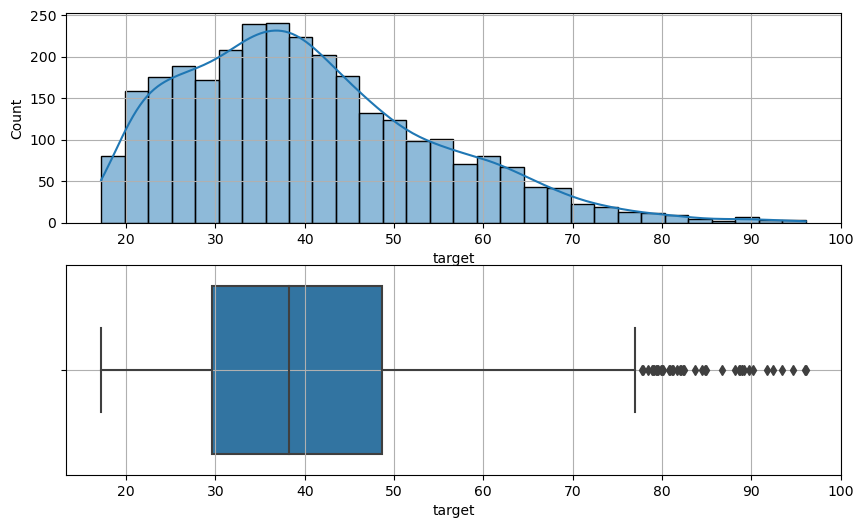


<< temp_max 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.076173,10.708693,-11.2,9.0,19.7,27.4,39.4


<< temp_max 시각화 >>


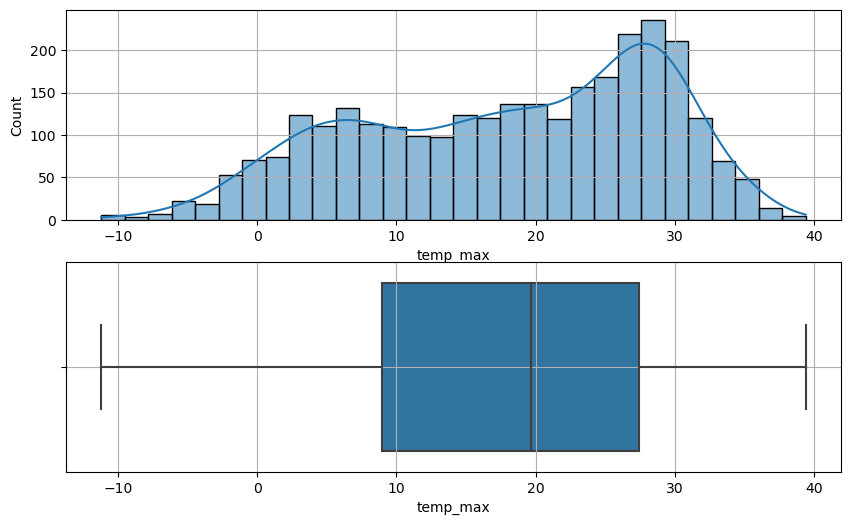


<< temp_min 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temp_min,2921.0,9.413591,10.78655,-18.5,0.5,10.0,18.9,30.4


<< temp_min 시각화 >>


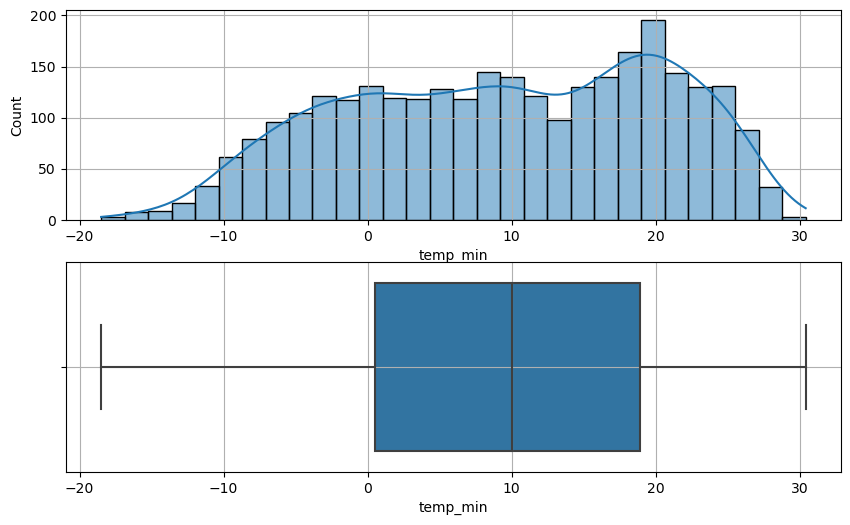


<< rain(mm) 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


<< rain(mm) 시각화 >>


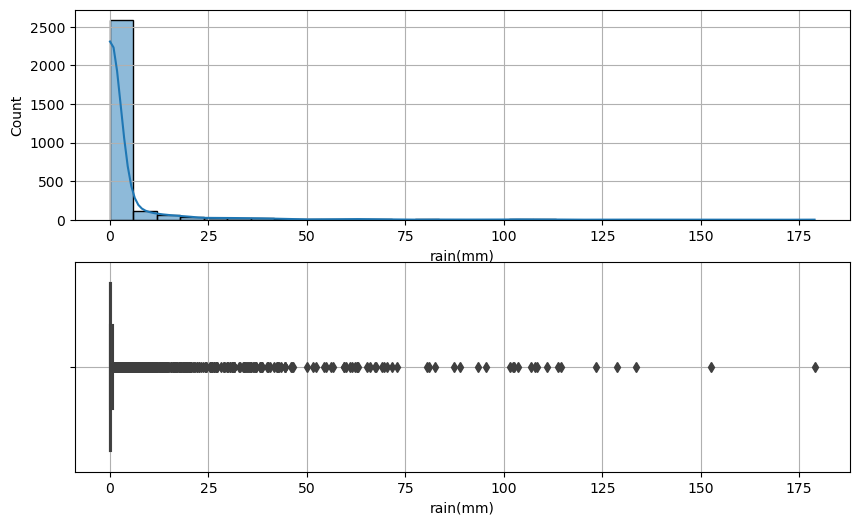


<< humidity_max(%) 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
humidity_max(%),2921.0,79.091407,14.033065,29.0,70.0,82.0,90.0,100.0


<< humidity_max(%) 시각화 >>


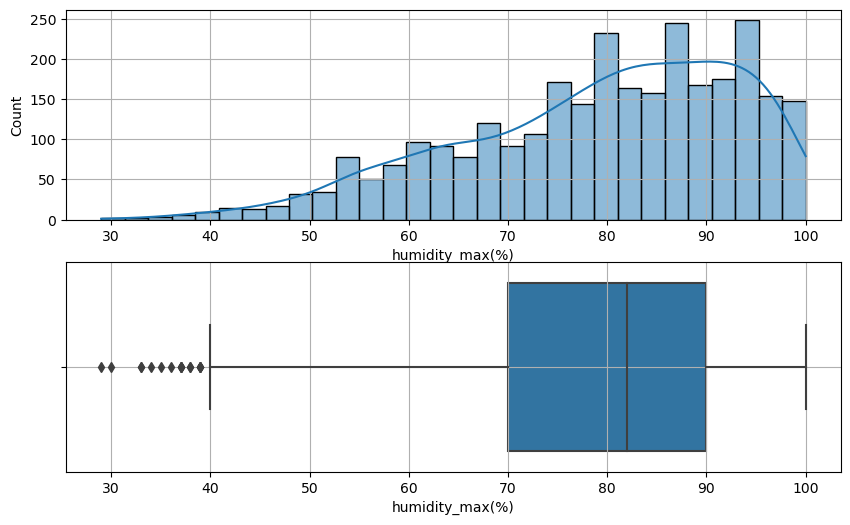


<< humidity_min(%) 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
humidity_min(%),2921.0,41.117015,16.401153,7.0,29.0,39.0,51.0,98.0


<< humidity_min(%) 시각화 >>


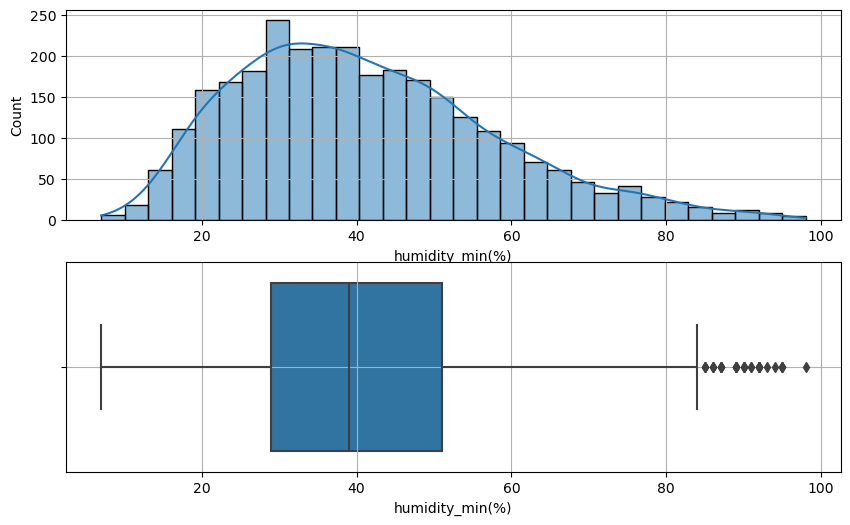


<< sunshine(MJ/m2) 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
sunshine(MJ/m2),2921.0,13.497333,6.941204,0.0,8.24,12.68,18.58,30.79


<< sunshine(MJ/m2) 시각화 >>


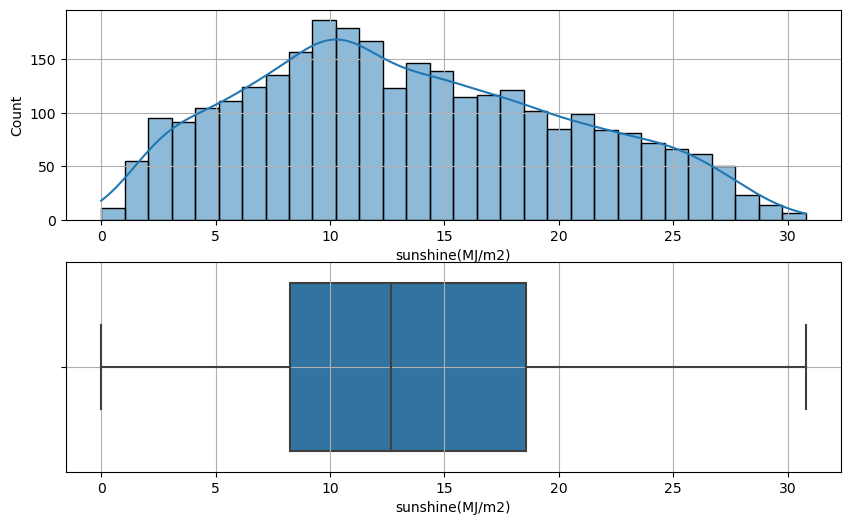


<< ave_waiting_time 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ave_waiting_time,2921.0,40.285964,12.046392,18.8,31.3,39.0,47.0,83.9


<< ave_waiting_time 시각화 >>


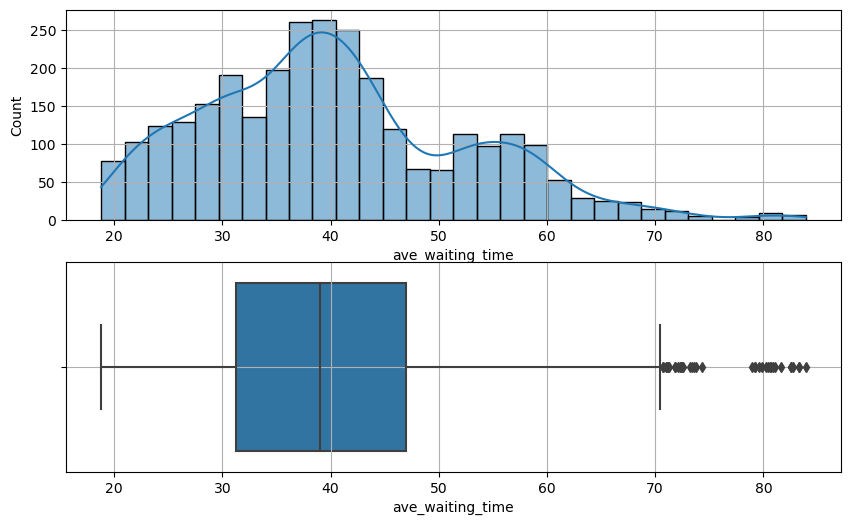


<< ride_rate 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ride_rate,2921.0,0.841551,0.052317,0.6,0.81,0.85,0.88,0.97


<< ride_rate 시각화 >>


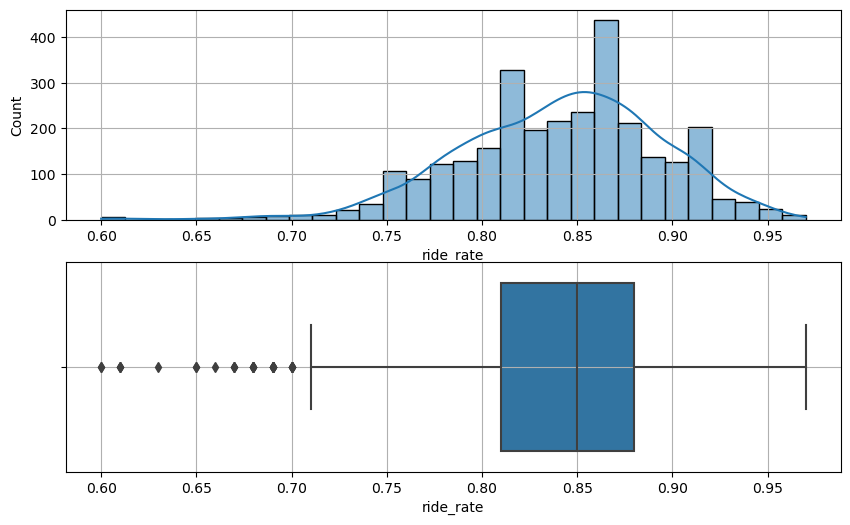

In [10]:
for var in numerical_var:
    eda_1_num(df, var)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [11]:
categorical_var = ['weekday', 'month', 'week', 'year', 'is_holiday']


<< weekday 기초통계량 >>


,count,ratio
3,418,0.143102
4,418,0.143102
0,417,0.142759
1,417,0.142759
2,417,0.142759
5,417,0.142759
6,417,0.142759


<< weekday 시각화 >>


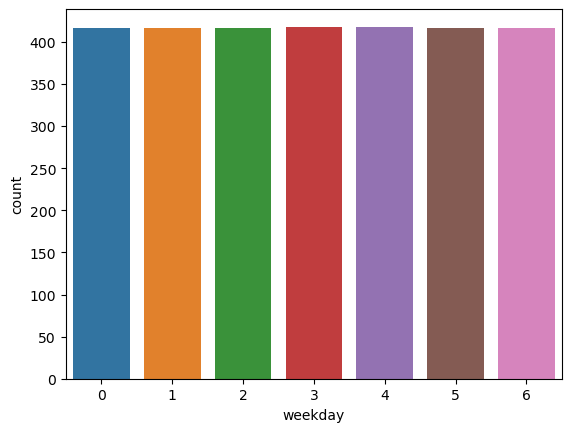


<< month 기초통계량 >>


,count,ratio
1,248,0.084902
3,248,0.084902
5,248,0.084902
7,248,0.084902
8,248,0.084902
10,248,0.084902
12,247,0.084560
4,240,0.082164
6,240,0.082164
9,240,0.082164


<< month 시각화 >>


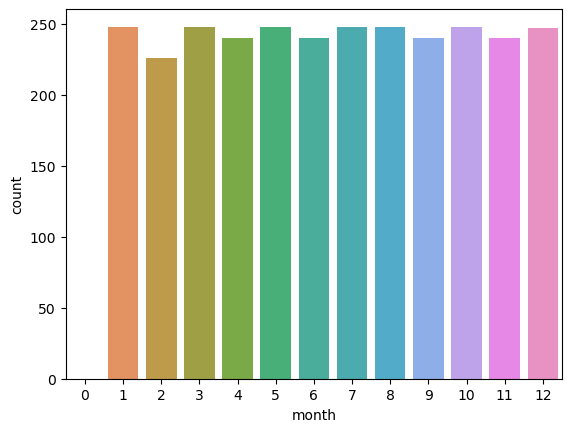


<< week 기초통계량 >>


,count,ratio
27,56,0.019172
39,56,0.019172
29,56,0.019172
30,56,0.019172
31,56,0.019172
32,56,0.019172
33,56,0.019172
34,56,0.019172
35,56,0.019172
36,56,0.019172


<< week 시각화 >>


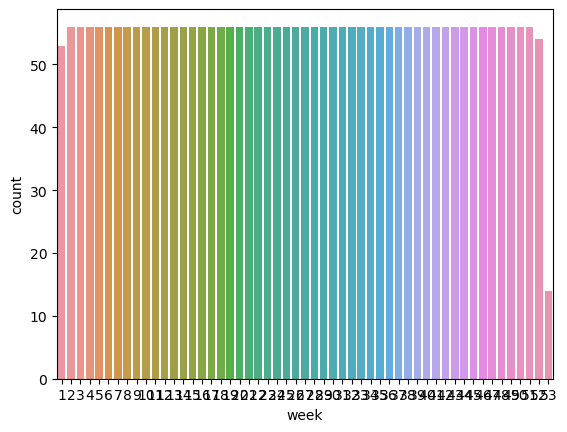


<< year 기초통계량 >>


,count,ratio
2016,366,0.125300
2020,366,0.125300
2015,365,0.124957
2017,365,0.124957
2018,365,0.124957
2019,365,0.124957
2021,365,0.124957
2022,364,0.124615


<< year 시각화 >>


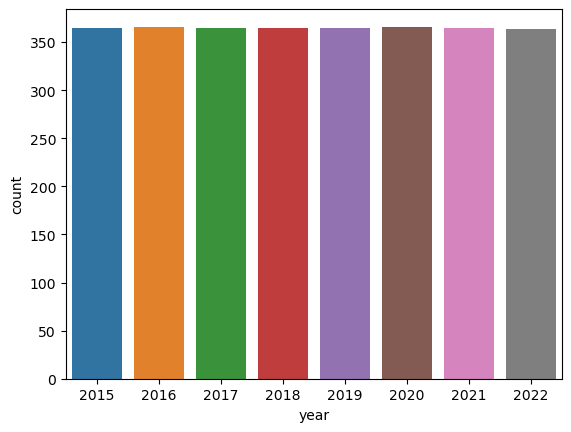


<< is_holiday 기초통계량 >>


,count,ratio
0,2802,0.959261
1,119,0.040739


<< is_holiday 시각화 >>


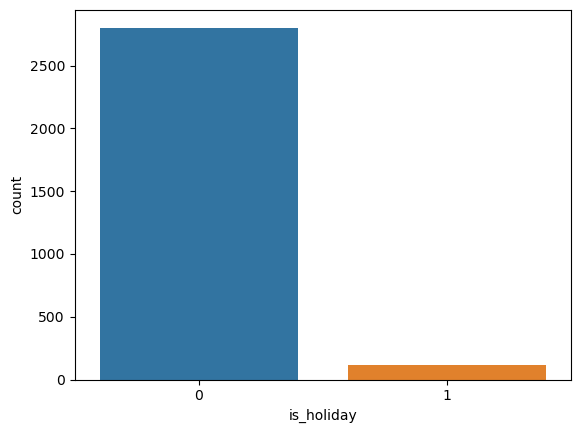

In [12]:
for var in categorical_var:
    eda_1_cat(df, var)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

상관계수는 : 0.1 이상

t-value, f-value : 2이상

In [13]:
#### 이변량 분석
### 숫자형-숫자형 분석
def eda_2_num(var, target, data=df):
    
    print("="*110)
    print(f'<< {var} 시각화 >>')
    # sns.scatterplot(x=var, y = target, data = data)
    # plt.show()

    sns.regplot(x=var, y = target, data = data)
    plt.show()

    print(f'<< {var} 상관분석 및 가설검정 >>')
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

In [14]:
#### 이변량 분석
### 범주형-숫자형 분석
def eda_2_cat(var, target, data=df):
    print("="*110)
    print(f'<< {var} 시각화 >>')

    sns.barplot(x = var, y = target, data=data)
    plt.show()

    print(f'<< {var} 상관분석 및 가설검정 >>')

    temp = data.loc[data[var].notnull()]
    cate = data[var].unique()
    arg = []
    for i in cate:
        arg.append(temp.loc[temp[var] == i, target])

    ## t-test
    if len(cate) == 2:
        result =spst.ttest_ind(arg[0], arg[1])
        print(f't-통계량 : {result[0]}, p-value : {result[1]}')

    ## ANOVA
    else:
        result = spst.f_oneway(*arg)
        print(f'f-통계량 : {result[0]}, p-value : {result[1]}')

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_10476\166817448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


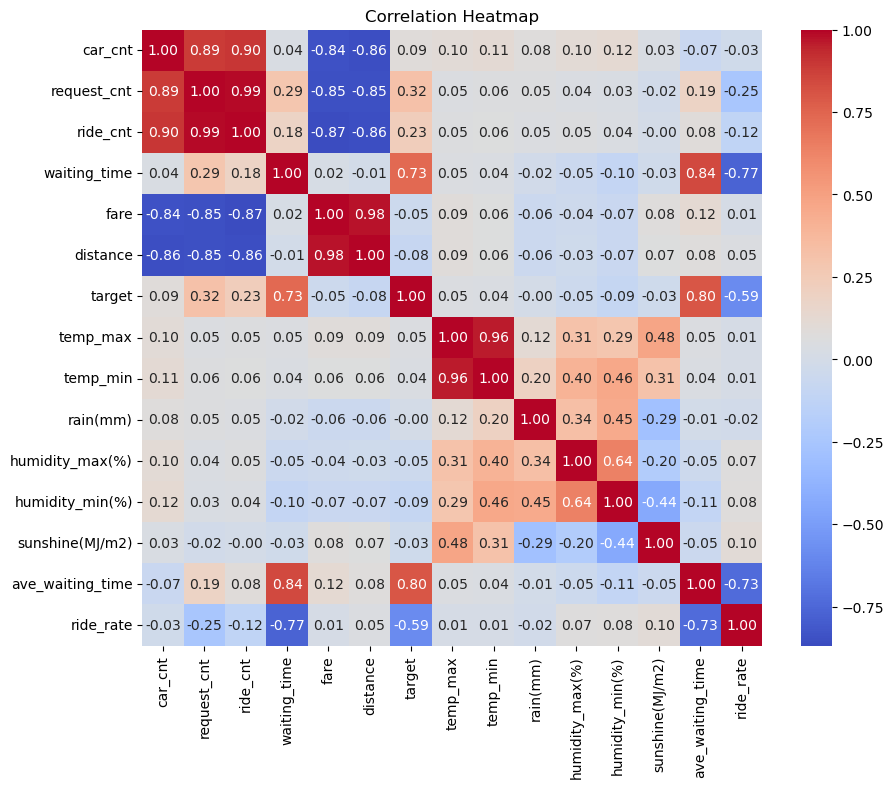

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# 0.1 이상
cols = ['request_cnt', 'ride_cnt', 'waiting_time', 'ave_waiting_time', 'ride_rate']

#### 2) 산점도

<< request_cnt 시각화 >>


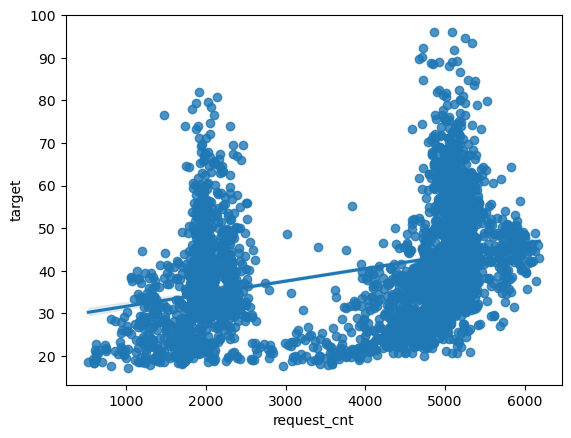

<< request_cnt 상관분석 및 가설검정 >>
상관계수 : 0.3161805705651031, p-value : 8.053505035866839e-69
<< ride_cnt 시각화 >>


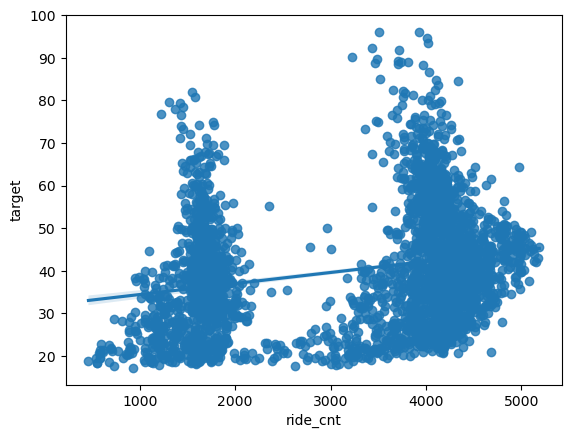

<< ride_cnt 상관분석 및 가설검정 >>
상관계수 : 0.2291268381339774, p-value : 4.212433475895381e-36
<< waiting_time 시각화 >>


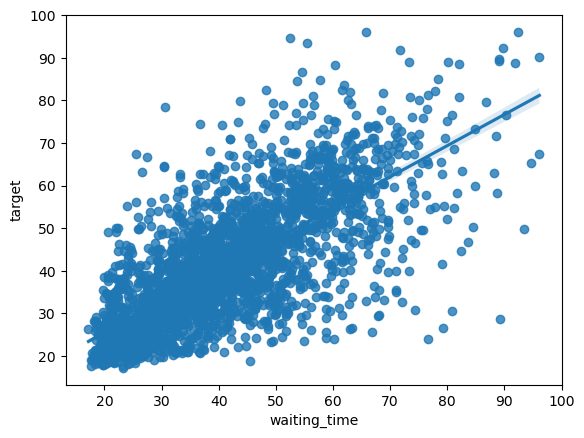

<< waiting_time 상관분석 및 가설검정 >>
상관계수 : 0.7322992847562532, p-value : 0.0
<< ave_waiting_time 시각화 >>


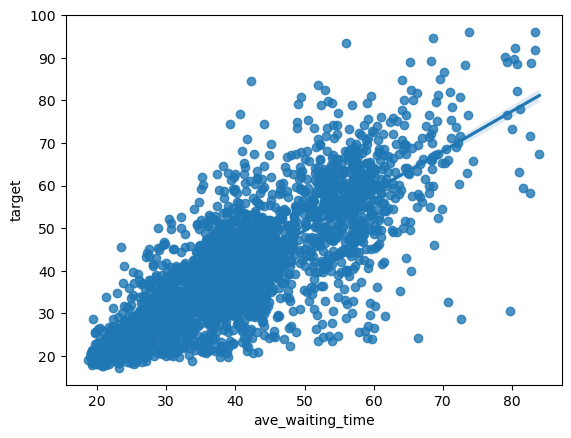

<< ave_waiting_time 상관분석 및 가설검정 >>
상관계수 : 0.8000304331289738, p-value : 0.0
<< ride_rate 시각화 >>


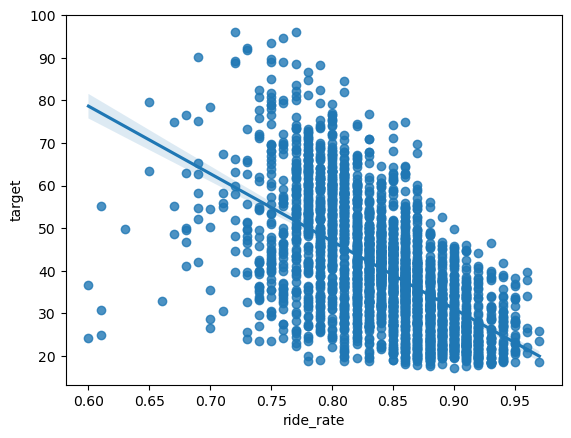

<< ride_rate 상관분석 및 가설검정 >>
상관계수 : -0.5888840483573232, p-value : 2.978423163252532e-272


In [17]:
for var in cols:
    eda_2_num(var, 'target')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

<< weekday 시각화 >>


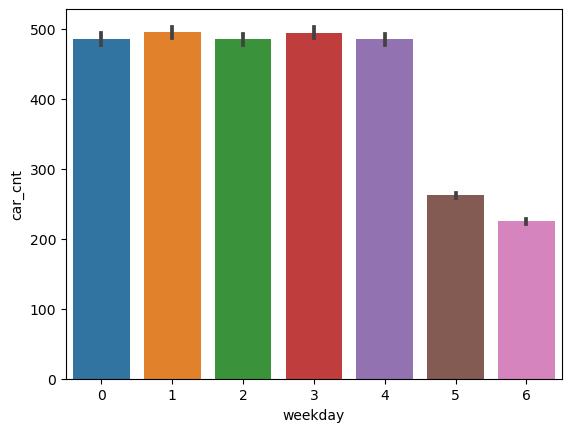

<< weekday 상관분석 및 가설검정 >>
f-통계량 : 1096.7569478539501, p-value : 0.0


In [18]:
eda_2_cat('weekday', 'car_cnt')

<< weekday 시각화 >>


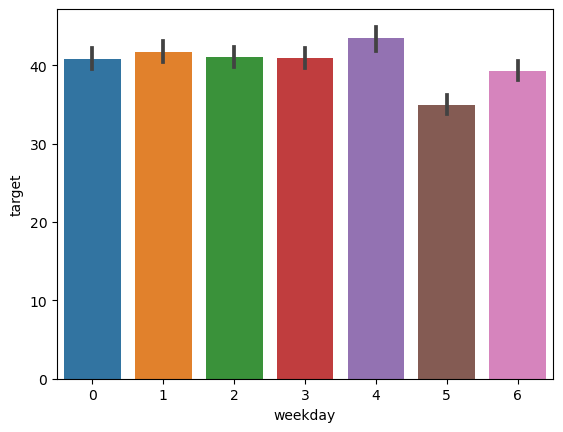

<< weekday 상관분석 및 가설검정 >>
f-통계량 : 15.709598754374598, p-value : 7.824951103498204e-18
<< month 시각화 >>


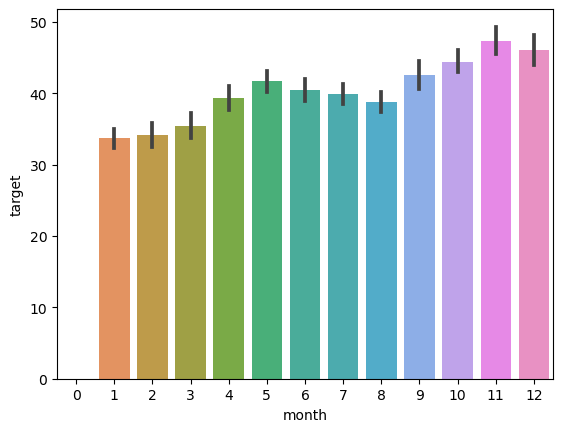

<< month 상관분석 및 가설검정 >>
f-통계량 : 26.038027587151618, p-value : 3.1376628494036258e-52
<< week 시각화 >>


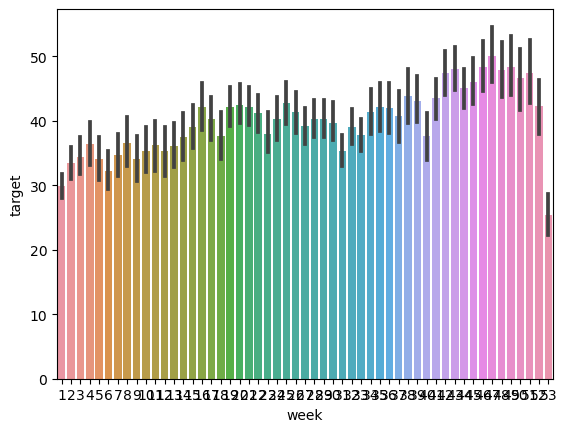

<< week 상관분석 및 가설검정 >>
f-통계량 : 7.186480362811633, p-value : 1.4040533433365622e-46
<< year 시각화 >>


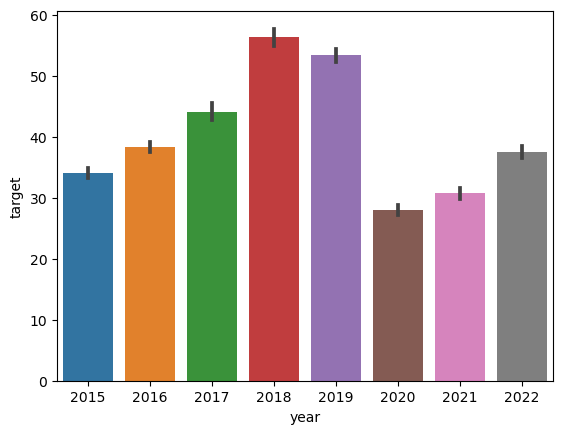

<< year 상관분석 및 가설검정 >>
f-통계량 : 360.9330046161704, p-value : 0.0
<< is_holiday 시각화 >>


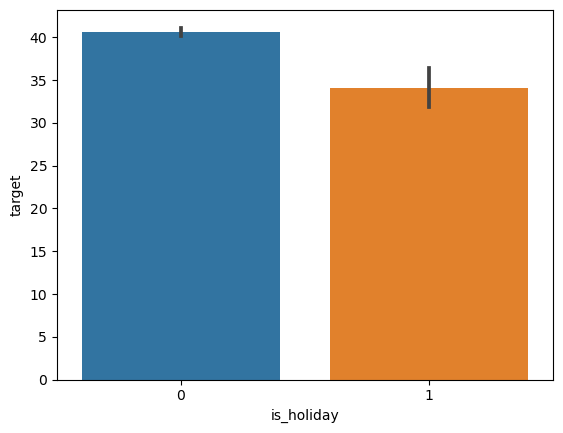

<< is_holiday 상관분석 및 가설검정 >>
t-통계량 : -4.99765770730323, p-value : 6.145444639480913e-07


In [19]:
for var in categorical_var:
    eda_2_cat(var, 'target')

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

숫자형 : avg_waiting_time > waiting_timg > ride_rate

범주형 : year > month > weekday > week

* 중간(약한) 관계의 변수

숫자형 : request_cnt > ride_cnt

범주형 : is_holiday

* (거의) 관계가 없는 변수

숫자형 : car_cnt , fare, distance, temp_max, temp_min, rain, humidity_max, humidity_min, sunshine

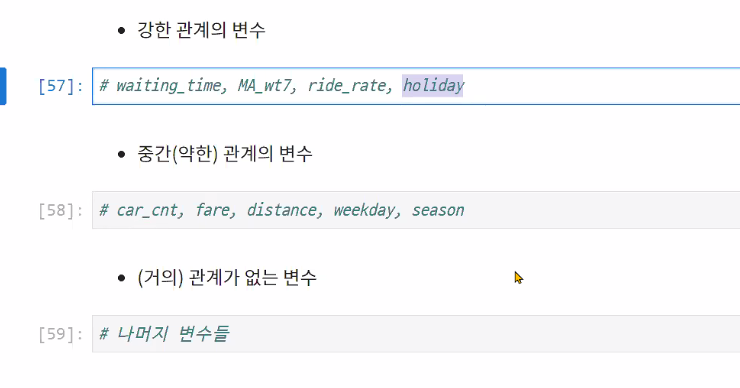

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [20]:
joblib.dump(df, 'data2.pkl')

['data2.pkl']